# K-means clustering

## Learning objectives
- implement K-means clustering from scratch

## The algorithm
# draw algorithm
- initialise k points in feature space representing the central point of a certain class
- until converged
    - assign each datapoint to the class represented by the nearest centroid
    - update the centroid position to the average feature vector of all of the datapoints currently assigned to initialise

## Implementation from scratch

### Make some fake data


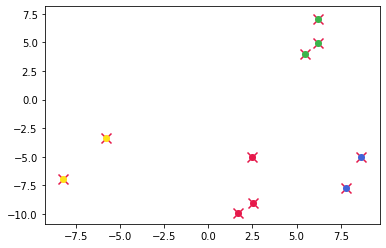

In [16]:
import sklearn.datasets
import matplotlib.pyplot as plt
from get_colors import colors

m = 10
n_features = 2
n_clusters = 4
X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=1.5)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

def show_data(X, Y, predictions=None, centroids=None):
    for i in range(n_clusters):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
        if centroids is not None:
            plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], s=300, marker='o')
    plt.show()

show_data(X, Y, np.zeros_like(Y))

### Implement the algorithm





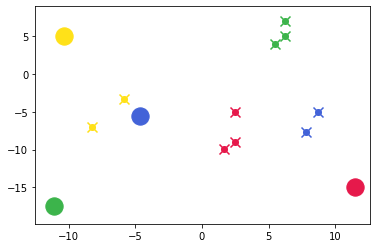


0
0
equal: True

1
3
equal: True

2
3
equal: True

3
3
equal: True

4
3
equal: True

5
3
equal: True

6
3
equal: True

7
0
equal: True

8
3
equal: True

9
3
equal: True
predictions
[0. 3. 3. 3. 3. 3. 3. 0. 3. 3.]


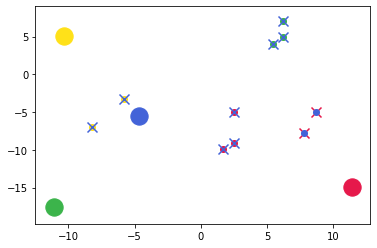

/home/ice/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ice/.local/lib/python3.6/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [17]:
import numpy as np

centroids = np.random.uniform(-20, 20, (n_clusters, n_features))
show_data(X, Y, Y, centroids)

converged = False
predictions = np.zeros(m)

while not converged:
    for idx, x in enumerate(X):
    # x = np.tile(X, (1, n_clusters))
        old_predictions = predictions

        print()
        print(idx)
        diff = x - centroids
        dists = np.linalg.norm(diff, axis=1) # take distance from each datapoint to each centroid
        closest_centroid_idx = np.argmin(dists)
        print(closest_centroid_idx)
        predictions[idx] = closest_centroid_idx
        print('equal:', np.array_equal(predictions, old_predictions))
    print('predictions')
    print(predictions)
    if np.array_equal(predictions, old_predictions):
        converged = True
    if idx == 100:
        converged = True
    
    show_data(X, Y, predictions, centroids)

    for i in range(n_clusters):
        new_centroid = np.mean(X[predictions == i], axis=0)
        centroids[i] = new_centroid        

## Challenge